### KNN Algorithm

- Non Parametric Model
- Instance Based
- Non - Linear model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv(r"C:/Users/91988/Desktop/FITA/datasets/iris/Iris.csv")

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### Understand the data

In [10]:
data.shape

(150, 6)

In [6]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Text(0, 0.5, 'Petal Length')

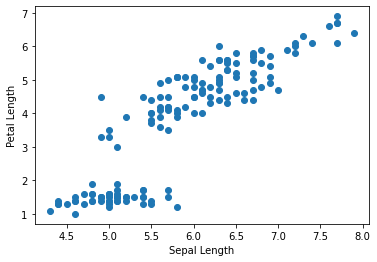

In [14]:
plt.scatter(data["SepalLengthCm"], data["PetalLengthCm"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

In [16]:
## try to show the different categories in the above scatter plot

Text(0, 0.5, 'Petal Length')

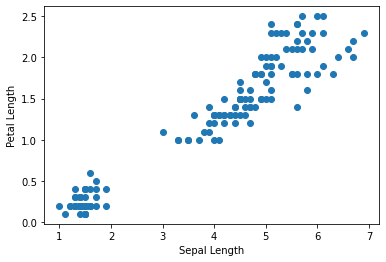

In [17]:
plt.scatter(data["PetalLengthCm"], data["PetalWidthCm"])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

##### Encoding of the target variable -- convert from string to numerical

In [18]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
### Method is doing it manually
data["Species"].unique()

# ['Iris-setosa'--> 0, 'Iris-versicolor'--> 1, 'Iris-virginica'--> 2]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
data["Species_en"] = data["Species"].apply(lambda x: 0 if x=="Iris-setosa" else (1 if x =="Iris-versicolor"  else 2))

In [30]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_en
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0
85,86,6.0,3.4,4.5,1.6,Iris-versicolor,1
129,130,7.2,3.0,5.8,1.6,Iris-virginica,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
112,113,6.8,3.0,5.5,2.1,Iris-virginica,2
81,82,5.5,2.4,3.7,1.0,Iris-versicolor,1
109,110,7.2,3.6,6.1,2.5,Iris-virginica,2
47,48,4.6,3.2,1.4,0.2,Iris-setosa,0
134,135,6.1,2.6,5.6,1.4,Iris-virginica,2


#### Using Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [34]:
label = LabelEncoder()
data["Species-en2"] =  label.fit_transform(data["Species"])

In [35]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_en,Species-en2
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [38]:
data = data.drop(["Id", "Species","Species-en2"], axis = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_en
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
#### Split the data into feature and label
target_cols = "Species_en"
feature_cols = data.columns.difference(["Species_en"])

# X = 

In [40]:
target_cols

'Species_en'

In [41]:
feature_cols

Index(['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm'], dtype='object')

In [42]:
X = data[feature_cols]
y = data[target_cols]

In [44]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_en, Length: 150, dtype: int64

#### Split the data into training and testing 

In [ ]:
### try to split the data manually into ratio of 70 and 30


In [ ]:
###  What is stratified Sampling?

In [45]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=12)

In [86]:
0.33*150

49.5

In [87]:
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((100, 4), (100,), (50, 4), (50,))

#### Scaling of data

In [89]:
## Using Standard Scaler ::

In [90]:
X_test.head()

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
40,1.3,0.3,5.0,3.5
146,5.0,1.9,6.3,2.5
38,1.3,0.2,4.4,3.0
99,4.1,1.3,5.7,2.8
143,5.9,2.3,6.8,3.2


#### Building the model Manually

In [91]:
new_point = [1.5, 0.2, 5.4, 3.1] #--- -> which category it belongs

- Steps to implement K-Nearest Neighbours
1. Find distance of this point from all the points
2. Determine k value  ( k = 1, 2, 3, 4, 5)
3. Find K nearest neighbours
4. Find the mode of the categories in the neighbours
5. Assign the class for the new_point

#### Building the model

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors=3)   ## Instantiating the model

In [94]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
train_preds = knn.predict(X_train)
test_preds = knn.predict(X_test)

In [96]:
train_preds, y_train.values

(array([2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0,
        2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1,
        1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1,
        1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2,
        2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1], dtype=int64),
 array([2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0,
        2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1,
        1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1,
        1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2,
        2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1], dtype=int64))

In [98]:
test_preds, y_test.values

(array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
        2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 2, 0], dtype=int64),
 array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
        2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 2, 0], dtype=int64))

In [99]:
### Manually calculate the accuracy, precision and recall

#### Evaluating the model

In [100]:
## using accuracy score
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(test_preds, y_test)
train_accuracy= accuracy_score(train_preds, y_train)
print(train_accuracy, test_accuracy)

0.96 0.98


In [101]:
## using score method
print("Training Score:: ",knn.score(X_train, y_train))
print("Testing Score:: ",knn.score(X_test, y_test))

Training Score::  0.96
Testing Score::  0.98


In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.97        50
weighted avg       0.98      0.98      0.98        50



In [104]:
### Make a confusion Matrix for this classification

#### Find the best possible value for k - Using manually iterating on different k values - ( not a standard approach)

In [105]:
### Want to Find the best k values between 1 and 10

train_accs, test_accs = [], []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

In [106]:
train_accs

[1.0, 0.96, 0.96, 0.96, 0.97, 0.98, 0.98, 0.97, 0.97]

In [107]:
test_accs

[0.98, 0.98, 0.98, 0.98, 0.98, 1.0, 0.98, 1.0, 0.98]

In [108]:
acc_df = pd.DataFrame({"k":range(1,10),
                      "train_accs":train_accs,
                      "test_accs":test_accs})

In [109]:
acc_df

,k,train_accs,test_accs
0,1,1.00,0.98
1,2,0.96,0.98
2,3,0.96,0.98
3,4,0.96,0.98
4,5,0.97,0.98
5,6,0.98,1.00
6,7,0.98,0.98
7,8,0.97,1.00
8,9,0.97,0.98


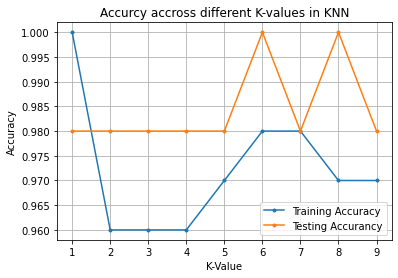

In [111]:
plt.plot(acc_df["k"],acc_df["train_accs"], marker= '.',label = "Training Accuracy")
plt.plot(acc_df["k"],acc_df["test_accs"], marker = ".",  label = "Testing Accurancy")
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.title("Accurcy accross different K-values in KNN")
plt.legend()
plt.grid()



In [ ]:
#### Apply the same manual method above for k-value 1 to 10  and weights "uniform" and "distance"

In [ ]:
[1,2,3,4,5,6,7,8,9,10]
["uniform", "distance"]

1 - uniform
1 - distance
2 -

#### Using Cross Validation to check the model

Applying manually:
- Split the data into 4 parts ( normally, stratified)
- Train and test the data interatively on the folds (k = 4)
- Find the average score and variability in the 4 scores. 

#### Finding the best parameters - using GridsearchCV

In [113]:
from sklearn.model_selection import GridSearchCV

In [124]:
knn = KNeighborsClassifier()

params_grid = {'n_neighbors' : [1,2,3,4,5],
              "weights":["uniform","distance"]}

gridsearch = GridSearchCV(knn, param_grid=params_grid, cv = 5 )

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [125]:
gridsearch.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

#### How to save the model - pickling of model

#### How to predict new points using the model

#### How to evaluate different algorithms

In [130]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier()
log_class = LogisticRegression()
dec_class = DecisionTreeClassifier()
rand_class = RandomForestClassifier()
svm_class = SVC()

model_list = [knn, log_class, dec_class, rand_class, svm_class]

model_dict = {}
for model in model_list:
    model.fit(X_train, y_train)
    model_dict[model.__class__.__name__]  = model.score(X_test, y_test)
    


C:\Users\91988\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
model_dict

{'KNeighborsClassifier': 0.98,
 'LogisticRegression': 0.98,
 'DecisionTreeClassifier': 0.98,
 'RandomForestClassifier': 0.98,
 'SVC': 0.98}

In [140]:
pd.DataFrame([model_dict], index = ["Accuracy"]).T

,Accuracy
KNeighborsClassifier,0.98
LogisticRegression,0.98
DecisionTreeClassifier,0.98
RandomForestClassifier,0.98
SVC,0.98
